# Notebook for resampling HAIL_MAX2D by US region

### Import necessary libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import netCDF4 as nc
from netCDF4 import Dataset
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

## Import WRF HIST, mid- and end-FUTR RCP 4.5, 8.5 files (resampled to daily max 12Z-12Z)- use these to test US regions later

In [122]:
hist = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/hist_daily_max_hail_inches.nc') #Open hist daily max .nc file saved to /home/scratch directory
mid4p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/mid_century_4p5_daily_max_hail_inches.nc') #Open mid-FUTR 4.5 daily max .nc file saved to /home/scratch directory
mid8p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/mid_century_8p5_daily_max_hail_inches.nc') #Open mid-FUTR 8.5 daily max .nc file saved to /home/scratch directory
end4p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/end_century_4p5_daily_max_hail_inches.nc') #Open end-FUTR 4.5 daily max .nc file saved to /home/scratch directory
end8p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/end_century_8p5_daily_max_hail_inches.nc') #Open end-FUTR 8.5 daily max .nc file saved to /home/scratch directory

## Read in WRF lat/lon coords

In [2]:
coords = xr.open_dataset('lat_lon.nc') #Open .nc file containing WRF lat/lon coords

In [3]:
coords

<xarray.Dataset>
Dimensions:     (Time: 1, south_north: 899, west_east: 1399,
                 south_north_stag: 900, west_east_stag: 1400, land_cat: 21,
                 soil_cat: 16, month: 12, num_urb_params: 132,
                 dust_erosion_dimension: 3)
Dimensions without coordinates: Time, south_north, west_east, south_north_stag,
                                west_east_stag, land_cat, soil_cat, month,
                                num_urb_params, dust_erosion_dimension
Data variables: (12/60)
    Times       (Time) |S19 ...
    XLAT_M      (Time, south_north, west_east) float32 ...
    XLONG_M     (Time, south_north, west_east) float32 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 ...
    ...          ...
    FRC_URB2D   (Time, south_north, west_east) float32 ...
    IMPERV      (Time, south_north, west_east) float32 ...
    CANFRA      (Time, south_north, west_east) float32 ...
    EROD        (Time, dust_erosion_dimension, south_north, west_east) float32 ...
    CLAYFRAC    (Time, south_north, west_east) float32 ...
    SANDFRAC    (Time, south_north, west_east) float32 ...
Attributes: (12/55)
    TITLE:                           OUTPUT FROM GEOGRID V4.1
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        1400
    SOUTH-NORTH_GRID_DIMENSION:      900
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_FRC_URB2D:                  1
    FLAG_IMPERV:                     1
    FLAG_CANFRA:                     1
    FLAG_EROD:                       1
    FLAG_CLAYFRAC:                   1
    FLAG_SANDFRAC:                   1

### Assign lat/lon coords from file to variables

In [5]:
lats = coords.CLAT.values[0, :, :]
lons = coords.CLONG.values[0, :, :]

### Make lats/lons 1D

In [13]:
lats_1d = lats.ravel() ##Use numpy's ravel method to return a contiguous flattened 1D array
lons_1d = lons.ravel()

In [38]:
lons_1d

array([-121.81102, -121.77783, -121.74463, ...,  -61.42981,  -61.38321,
        -61.33661], dtype=float32)

## Find lat/lon bounds for each US subregion (trial and error for each region)

In [402]:
lons_1d[487] # ***Midwest west lon bound***

-105.03284

In [277]:
lons_1d[769] # ***Midwest east lon bound***

-95.00778

In [119]:
lats_1d

array([20.509216, 20.517616, 20.525993, ..., 48.91788 , 48.905216,
       48.89253 ], dtype=float32)

In [425]:
lats_1d[411443] # ***Midwest south lat bound***  ***Divide the index found in this part by 1399 to obtain 3.75-km grid index

31.001286

In [467]:
lats_1d[699809] # ***Midwest north lat bound*** ***Divide the index found in this part by 1399 to obtain 3.75-km grid index

39.000225

In [27]:
#coords.south_north.values values 1-899
#coords.west_east.values values 1-1399
coords.west_east.values.shape

(1399,)

In [403]:
coords.west_east.values[487] # ***Midwest west bound***

487

In [278]:
coords.west_east.values[769] # ***Midwest east bound***

769

In [426]:
coords.south_north.values[294] # ***Midwest south bound***

294

In [468]:
coords.south_north.values[500] # ***Midwest north bound***

500

## Sel south_north and west_east values for Midwest for each climate epoch

In [123]:
midwest_hist = hist.sel(south_north = slice(500, 715), west_east = slice(797, 1196))
midwest_mid4p5 = mid4p5.sel(south_north = slice(500, 715), west_east = slice(797, 1196))
midwest_mid8p5 = mid8p5.sel(south_north = slice(500, 715), west_east = slice(797, 1196))
midwest_end4p5 = end4p5.sel(south_north = slice(500, 715), west_east = slice(797, 1196))
midwest_end8p5 = end8p5.sel(south_north = slice(500, 715), west_east = slice(797, 1196))

## Save each file to netcdf

In [124]:
midwest_hist.to_netcdf('/home/scratch/jgoodin/US_subregions/hist_midwest_daily_max.nc')
midwest_mid4p5.to_netcdf('/home/scratch/jgoodin/US_subregions/mid4p5_midwest_daily_max.nc')
midwest_mid8p5.to_netcdf('/home/scratch/jgoodin/US_subregions/mid8p5_midwest_daily_max.nc')
midwest_end4p5.to_netcdf('/home/scratch/jgoodin/US_subregions/end4p5_midwest_daily_max.nc')
midwest_end8p5.to_netcdf('/home/scratch/jgoodin/US_subregions/end8p5_midwest_daily_max.nc')

## Sel south_north and west_east values for South for each climate epoch

In [237]:
south_hist = hist.sel(south_north = slice(294, 436), west_east = slice(797, 1138))
south_mid4p5 = mid4p5.sel(south_north = slice(294, 436), west_east = slice(797, 1138))
south_mid8p5 = mid8p5.sel(south_north = slice(294, 436), west_east = slice(797, 1138))
south_end4p5 = end4p5.sel(south_north = slice(294, 436), west_east = slice(797, 1138))
south_end8p5 = end8p5.sel(south_north = slice(294, 436), west_east = slice(797, 1138))

## Save each file to netcdf

In [238]:
south_hist.to_netcdf('/home/scratch/jgoodin/US_subregions/hist_south_daily_max.nc')
south_mid4p5.to_netcdf('/home/scratch/jgoodin/US_subregions/mid4p5_south_daily_max.nc')
south_mid8p5.to_netcdf('/home/scratch/jgoodin/US_subregions/mid8p5_south_daily_max.nc')
south_end4p5.to_netcdf('/home/scratch/jgoodin/US_subregions/end4p5_south_daily_max.nc')
south_end8p5.to_netcdf('/home/scratch/jgoodin/US_subregions/end8p5_south_daily_max.nc')

## Sel south_north and west_east values for Upper-Plains for each climate epoch

In [386]:
upper_plains_hist = hist.sel(south_north = slice(515, 751), west_east = slice(374, 769))
upper_plains_mid4p5 = mid4p5.sel(south_north = slice(515, 751), west_east = slice(374, 769))
upper_plains_mid8p5 = mid8p5.sel(south_north = slice(515, 751), west_east = slice(374, 769))
upper_plains_end4p5 = end4p5.sel(south_north = slice(515, 751), west_east = slice(374, 769))
upper_plains_end8p5 = end8p5.sel(south_north = slice(515, 751), west_east = slice(374, 769))

### Save to .nc

In [388]:
upper_plains_hist.to_netcdf('/home/scratch/jgoodin/US_subregions/hist_upper_plains_daily_max.nc')
upper_plains_mid4p5.to_netcdf('/home/scratch/jgoodin/US_subregions/mid4p5_upper_plains_daily_max.nc')
upper_plains_mid8p5.to_netcdf('/home/scratch/jgoodin/US_subregions/mid8p5_upper_plains_daily_max.nc')
upper_plains_end4p5.to_netcdf('/home/scratch/jgoodin/US_subregions/end4p5_upper_plains_daily_max.nc')
upper_plains_end8p5.to_netcdf('/home/scratch/jgoodin/US_subregions/end8p5_upper_plains_daily_max.nc')

## Sel south_north and west_east values for Lower-Plains for each climate epoch

In [470]:
lower_plains_hist = hist.sel(south_north = slice(294, 500), west_east = slice(487, 769))
lower_plains_mid4p5 = mid4p5.sel(south_north = slice(294, 500), west_east = slice(487, 769))
lower_plains_mid8p5 = mid8p5.sel(south_north = slice(294, 500), west_east = slice(487, 769))
lower_plains_end4p5 = end4p5.sel(south_north = slice(294, 500), west_east = slice(487, 769))
lower_plains_end8p5 = end8p5.sel(south_north = slice(294, 500), west_east = slice(487, 769))

### Save to .nc

In [471]:
lower_plains_hist.to_netcdf('/home/scratch/jgoodin/US_subregions/hist_lower_plains_daily_max.nc')
lower_plains_mid4p5.to_netcdf('/home/scratch/jgoodin/US_subregions/mid4p5_lower_plains_daily_max.nc')
lower_plains_mid8p5.to_netcdf('/home/scratch/jgoodin/US_subregions/mid8p5_lower_plains_daily_max.nc')
lower_plains_end4p5.to_netcdf('/home/scratch/jgoodin/US_subregions/end4p5_lower_plains_daily_max.nc')
lower_plains_end8p5.to_netcdf('/home/scratch/jgoodin/US_subregions/end8p5_lower_plains_daily_max.nc')

In [ ]:
#test = hist.sel(south_north=slice(0, 500), west_east=slice(0,500))
#coord = [[100, 37], [80, 37], [80, 45], [100, 45]]
#coord.append(coord[0])
#xs, ys = zip(*coord)

In [17]:
hist

<xarray.Dataset>
Dimensions:     (Time: 5479, south_north: 899, west_east: 1399)
Coordinates:
  * Time        (Time) datetime64[ns] 1990-09-30T12:00:00 ... 2005-09-29T12:0...
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) float32 ...

In [9]:
#hist.south_north.values

### Use annual sev hail days to test plot US regions

In [10]:
ds_sevr = 1 * (hist >= 0.0254) #Assign values of 1 to cells that meet sev criteria, assign days containing 1 cells as value of 1

In [11]:
sev_hail_days = ds_sevr.groupby('Time.year').sum(dim = 'Time').mean(dim = 'year') #Groupby year and sum sev days across time dim- take mean to find mean 
#sev hail days across WRF HIST

In [ ]:
sev_hail_days

<xarray.Dataset>
Dimensions:     (south_north: 899, west_east: 1399)
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (south_north, west_east) float64 0.0 0.0 0.0 ... 0.125 0.125

In [ ]:
sev_hail_days = sev_hail_days.HAIL_MAX2D #**This is the plotting variable**

## Select by south_north and west_east "coordinates" to roughly match US subregions

### NOTE: south_north and west_east coords have data attached to them- we must sel by these

In [ ]:
midwest = sev_hail_days.sel(south_north = slice(500, 700), west_east = slice(800, 1100))

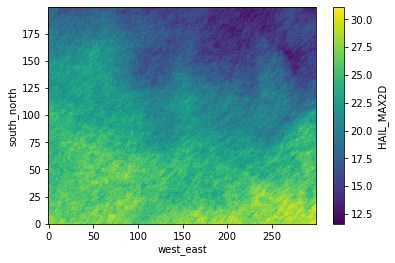

In [ ]:
midwest.plot() #Make sure south_north and west_east coords are correct

## Sel lat and lon slices to roughly match US regions- create and display rectangles to get desired regions

In [ ]:
coord = [[266, 38], [280, 38], [280, 45], [266, 45]]
coord.append(coord[0])
xs_midwest, ys_midwest = zip(*coord)

coord1 = [[266, 31], [278, 31], [278, 37], [266, 37]]
coord1.append(coord1[0])
xs_south, ys_south = zip(*coord1)

coord2 = [[251, 40], [265, 40], [265, 48.5], [251, 48.5]]
coord2.append(coord2[0])
xs_upper_plains, ys_upper_plains = zip(*coord2)

coord3 = [[255, 31], [265, 31], [265, 39], [255, 39]]
coord3.append(coord3[0])
xs_lower_plains, ys_lower_plains = zip(*coord3)

In [21]:
midwest_coords = coords.sel(south_north = slice(500, 700), west_east = slice(800, 1100)) #south_north = slice(38, 45), west_east = slice(266, 280)
#midwest_coords.south_north
#south = coords.sel(lats = slice(31, 37), lons = slice(266, 278))
#upper_plains = coords.sel(lats = slice(40, 48.5), lons = slice(251, 265))
#lower_plains = coords.sel(lats = slice(31, 39), lons = slice(255, 265))

In [ ]:
"""
midwest = coords.where((coords.CLAT < 280) & (coords.CLAT > 266) & (coords.CLONG < 45) & (coords.CLONG > 38), drop = True)
south = coords.where((coords.CLAT < 278) & (coords.CLAT > 266) & (coords.CLONG < 37) & (coords.CLONG > 31), drop = True)
upper_plains = coords.where((coords.CLAT < 265) & (coords.CLAT > 251) & (coords.CLONG < 48.5) & (coords.CLONG > 40), drop = True)
lower_plains = coords.where((coords.CLAT < 265) & (coords.CLAT > 255) & (coords.CLONG < 39) & (coords.CLONG > 31), drop = True)
"""

### Plot WRF lat/lon rectangles and south_north, west_east coord sels on same CONUS map layout as data is being plotted

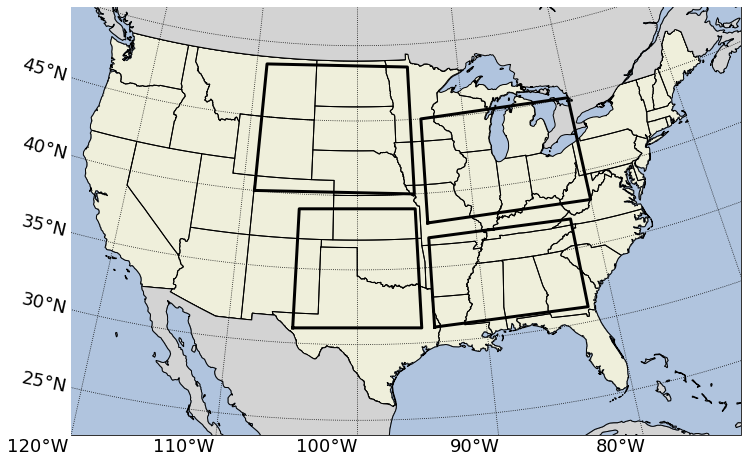

In [107]:
fig = plt.figure(figsize= (12,8)) #Plot a figure
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1, .05], bottom=.05, top=.95, wspace=.1)
map_proj = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35) #Set projection, central lat/lon
ax = plt.subplot(projection = map_proj)
#ax.set_title('Maximum diameter hail for 2005', fontsize = 22)
ax.add_feature(cfeature.LAND.with_scale('10m')) #Add land
countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='lightgrey', edgecolor='k', zorder=6)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='k', 
                                                facecolor='None'), zorder=8) 
ax.add_feature(cfeature.BORDERS.with_scale('10m')) #Add state borders
ax.add_feature(cfeature.STATES.with_scale('10m'), facecolor = 'none') #Add US states
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'), zorder=6)
lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=6)
#lrFig = ax.pcolormesh(midwest, vmax = 30, cmap = 'viridis', transform = ccrs.PlateCarree(), zorder = 6) 
#midwest.plot(ax = ax, transform=ccrs.PlateCarree(), cmap = 'viridis')
ax.set_extent([240,287,22,50]) #Set lat/lon boundaries
#Check that south_north and west_east bounds are correct for each subregion

plt.plot(xs_midwest, ys_midwest, transform=cartopy.crs.PlateCarree(), color = 'black', linewidth = 3, zorder = 15)
plt.plot(xs_south, ys_south, transform=cartopy.crs.PlateCarree(), color = 'black', linewidth = 3, zorder = 15)
plt.plot(xs_upper_plains, ys_upper_plains, transform=cartopy.crs.PlateCarree(), color = 'black', linewidth = 3, zorder = 15)
plt.plot(xs_lower_plains, ys_lower_plains, transform=cartopy.crs.PlateCarree(), color = 'black', linewidth = 3, zorder = 15)

gls = ax.gridlines(draw_labels=True, dms = True, x_inline=False, y_inline=False, color="black", linestyle="dotted", zorder = 10)
gls.top_labels=False
gls.right_labels=False
gls.xlabel_style = {'size': 18, 'rotation': 0}
gls.xpadding = 12.0
gls.ylabel_style = {'size': 18}
#ax1 = plt.subplot(gs1[1, 0])
#cb = plt.colorbar(lrFig, cax = ax1, ticks = [0, 5, 10, 15, 20, 25, 30], orientation = 'horizontal', extend = 'max')
#cb.set_label('Days', fontsize = 30)
#cb.ax.tick_params(labelsize = 30)
plt.subplots_adjust(bottom=0.12)